# COX Regression

The ultimate purpose of the Cox proportional hazard method is to notice how different factors in our dataset impact the event of interest.

We intend to find the hazard function / ratio HR.

If HR = 1 ==> No Effect
If HR > 1 ==> Increase in hazard
If HR < 1 ==> Decrease in hazard

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [6]:
data = pd.read_csv("lung.csv")
data =  data.drop(["Unnamed: 0"],axis=1)
data.head()
data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])


In [8]:
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1


data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]
cph = CoxPHFitter()

cph.fit(data,"time",event_col="dead")
cph.print_summary()

/usr/local/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2022-07-07 15:08:31 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.93   0.35       1.51
sex           0.00 -2.75   0.01       7.37
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.49   0.14       2.87
meal.cal      0.00  0.11   0.91       0.13
wt.loss       0.00 -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

Plotting survival function

<AxesSubplot:>

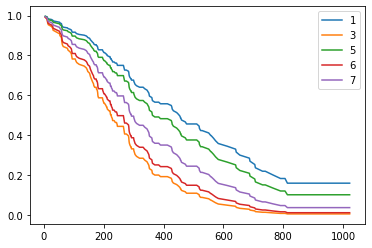

In [9]:
d_data = data.iloc[0:5, :]
cph.predict_survival_function(d_data).plot()